In [1]:
import numpy as np; np.random.seed(42)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Housing.csv")

In [3]:
list1 = []

for i in df.columns:
    if df[i].dtypes == "int64":
        list1.append(i)
list1

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df_corr=df[['price','area','bedrooms','bathrooms','stories','parking']].corr()
df_corr

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


<AxesSubplot:>

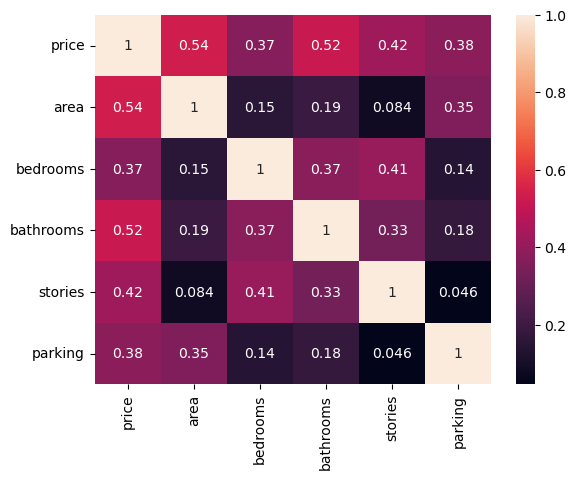

In [6]:
sns.heatmap(df_corr,annot = True)

In [7]:
df1 = df.loc[:, list1]
df1

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


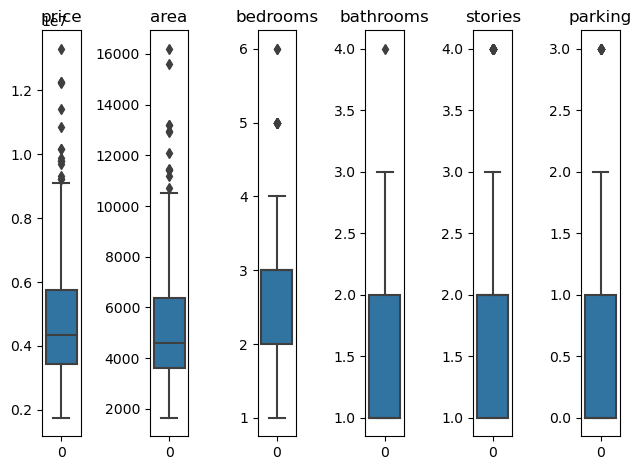

In [9]:
columns_to_plot = ['price','area','bedrooms','bathrooms','stories','parking']

# Create the figure and two subplots
fig, axes = plt.subplots(ncols=len(columns_to_plot))

# Create the boxplot with Seaborn
for column, axis in zip(columns_to_plot, axes):
        sns.boxplot(data=df[column], ax=axis) 
        axis.set_title(column)
        # axis.set(xticklabels=[], xticks=[], ylabel=column)

# Show the plot
plt.tight_layout()
plt.show()

In [10]:
def quart(i):
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    print("Q1 is ",Q1)
    print("Q3 is ",Q3)
    IQR = Q3 - Q1
    print("IQR is ",IQR)
    Lowerlimit = Q1 - 1.5 * IQR
    Upperlimit = Q3 + 1.5 * IQR
    df_outlier = df1[(df1[i]>Lowerlimit) & (df1[i]<Upperlimit)]
    df = df_outlier
    return df

In [11]:
df = quart('price')

Q1 is  3430000.0
Q3 is  5740000.0
IQR is  2310000.0


In [12]:
df = quart('area')

Q1 is  3600.0
Q3 is  6360.0
IQR is  2760.0


In [13]:
df = quart('bedrooms')

Q1 is  2.0
Q3 is  3.0
IQR is  1.0


In [14]:
df = quart('bathrooms')

Q1 is  1.0
Q3 is  2.0
IQR is  1.0


In [15]:
df = quart('stories')

Q1 is  1.0
Q3 is  2.0
IQR is  1.0


In [16]:
df = quart('parking')

Q1 is  0.0
Q3 is  1.0
IQR is  1.0


In [17]:
df

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
2,12250000,9960,3,2,2,2
4,11410000,7420,4,1,2,2
5,10850000,7500,3,3,1,2
6,10150000,8580,4,3,4,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


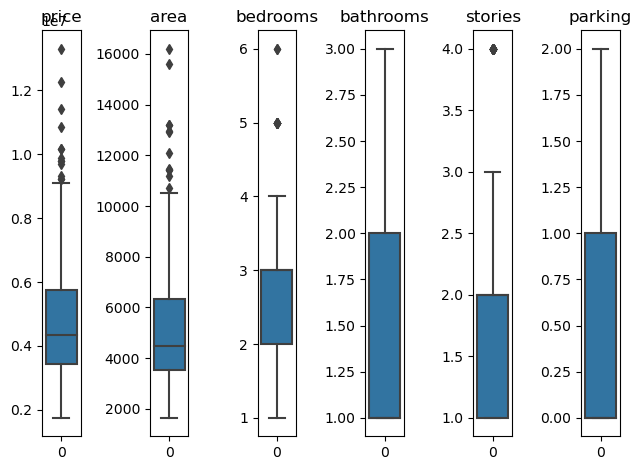

In [18]:
columns_to_plot = ['price','area','bedrooms','bathrooms','stories','parking']

# Create the figure and two subplots
fig, axes = plt.subplots(ncols=len(columns_to_plot))

# Create the boxplot with Seaborn
for column, axis in zip(columns_to_plot, axes):
        sns.boxplot(data=df[column], ax=axis) 
        axis.set_title(column)
        # axis.set(xticklabels=[], xticks=[], ylabel=column)

# Show the plot
plt.tight_layout()
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [20]:
y=df["price"]
x=df.drop(["price"],axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25,random_state=45)

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred=lr.predict(X_test)

In [28]:
from sklearn.metrics import r2_score,mean_squared_error
lr.score(X_train,y_train)

0.5832979893640757

In [29]:
mean_squared_error(y_test, y_pred)

1335203080051.3267